In [2]:
import sys
import gym
import numpy as np
import random
import math
from collections import defaultdict, deque
import matplotlib.pyplot as plt
%matplotlib inline

import check_test
from plot_utils import plot_values

In [3]:
#create an instance of CliffWalking environment
env = gym.make('CliffWalking-v0')

In [4]:
print("Actions_space: {0}".format(env.action_space))
print("State Space: {0}".format(env.observation_space))
print("Action Space (env.action_space.n) {0}: ".format(env.action_space.n))

Actions_space: Discrete(4)
State Space: Discrete(48)
Action Space (env.action_space.n) 4: 


In [5]:
def epsilon_greedy_q_learning(Q, state, nA, eps):
    if random.random() > eps:
        return np.argmax(Q[state])
    else:
        return random.choice(np.arange(nA))
    

def update_Q_QLearning(alpha, gamma, Q, state, action, reward, next_state=None):
    current_state = Q[state][action]
    
    if next_state is not None:
        next_reward = np.max(Q[next_state])
    else: 
        next_reward = 0 
    
    target = reward + gamma * next_reward
    
    new_reward_curr_state = current_state + alpha * (target - current_state)
    
    return new_reward_curr_state

In [8]:
def q_learning(env, num_episodes, alpha, gamma=1.0,plot_every=100):
    
    nA = env.action_space.n
    # initialize empty dictionary of arrays
    Q = defaultdict(lambda: np.zeros(env.nA))
    
    #quques to track tmp and avg scores
    tmp_scores = deque(maxlen = plot_every)
    avg_scores = deque(maxlen = num_episodes)
    
    # loop over episodes
    for i_episode in range(1, num_episodes+1):
        # monitor progress
        if i_episode % 100 == 0:
            print("\rEpisode {}/{}".format(i_episode, num_episodes), end="")
            sys.stdout.flush()
        
        score = 0 
        state = env.reset()
        
        eps = 1.0 / i_episode
    
        while True: 
            action = epsilon_greedy_q_learning(Q, state, nA, eps)
            next_state, reward, done, info = env.step(action)
            score += reward
            
            Q[state][action] = update_Q_QLearning(alpha, gamma, Q, state, \
                                                     action, reward,next_state)
            state = next_state
            if done:
                tmp_scores.append(score)
                break
                
            
        if i_episode % plot_every == 0:
            avg_scores.append(np.mean(tmp_scores))
        
    #Plot Performance
    plt.plot(np.linspace(0,num_episodes, len(avg_scores), endpoint=False), np.asarray(avg_scores))
    plt.xlabel("Number of Episodes")
    plt.ylabel("Avg Reward every {0} episode".format(plot_every))
    plt.show()
            
        
    return Q

Episode 5000/5000

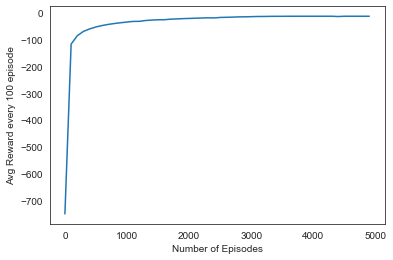

**<span style="color: green;">PASSED</span>**


Estimated Optimal Policy (UP = 0, RIGHT = 1, DOWN = 2, LEFT = 3, N/A = -1):
[[ 0  0  2  0  1  2  1  1  1  1  2  0]
 [ 2  1  1  0  1  1  1  2  1  1  1  2]
 [ 1  1  1  1  1  1  1  1  1  1  1  2]
 [ 0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0]]


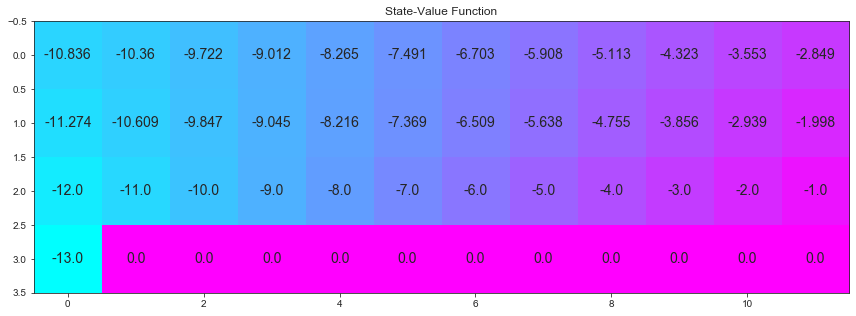

In [9]:
# obtain the estimated optimal policy and corresponding action-value function
Q_sarsamax = q_learning(env, 5000, .01)

# print the estimated optimal policy
policy_sarsamax = np.array([np.argmax(Q_sarsamax[key]) if key in Q_sarsamax else -1 for key in np.arange(48)]).reshape((4,12))
check_test.run_check('td_control_check', policy_sarsamax)
print("\nEstimated Optimal Policy (UP = 0, RIGHT = 1, DOWN = 2, LEFT = 3, N/A = -1):")
print(policy_sarsamax)

# plot the estimated optimal state-value function
plot_values([np.max(Q_sarsamax[key]) if key in Q_sarsamax else 0 for key in np.arange(48)])